**Credit Card Fraud Detection Project**

**Author:** Akshay Bhujbal  
**Project Type:** AI / Machine Learning Portfolio Project  

**Project Overview**

This project demonstrates a **Credit Card Fraud Detection system** using a **Random Forest Classifier**.  
The app allows users to:

1. Select a **sample transaction** from the dataset.  
2. Enter **all 30 features manually**.  
3. Lookup **any transaction by its Index**.  

The model was trained on ~284,000 transactions with 30 features (`Time`, `V1`–`V28`, `Amount`) and predicts whether a transaction is **fraudulent or not**.


# Load Dataset

- **pd.read_csv** loads the CSV file into a DataFrame.
- **data.head()** shows the first 5 rows to check how your data looks.

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Projects_Sorted\AI-Portfolio\Showcase-Projects\Credit-Card-Fraud-Detection\data\creditcard.csv")

# See first few rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis (EDA)
## Check basic info:

- ```data.shape``` → shows rows and columns.
- ```data.info()``` → shows data types and missing values.
- ```data.describe()``` → shows mean, min, max, etc. for numeric features.

In [2]:
# Shape of dataset
print(data.shape)

(284807, 31)


In [3]:
# Column info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Summary statistics
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

## Check for missing values:

- ```isnull().sum()``` counts missing values per column.
- This dataset has **no missing values**, so we’re good.

In [5]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Visualize class distribution:

- Shows how many transactions are **fraudulent (1)** vs **non-fraudulent (0).**
- The dataset is **highly imbalanced** → very few frauds.

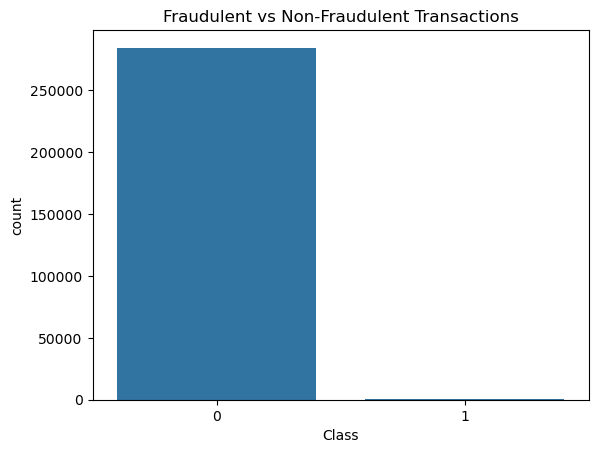

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=data)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

## Check correlations

- Helps see which features are strongly correlated with ```Class``` (fraud).
- Useful for feature selection later.

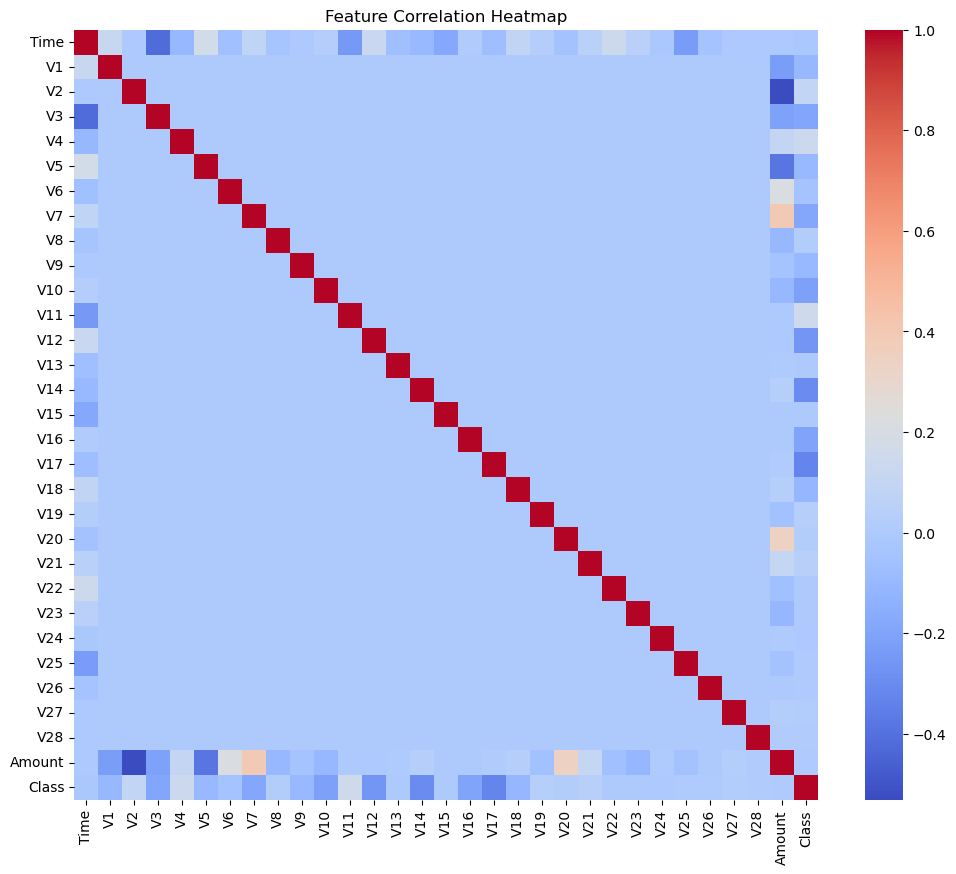

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare Data for Machine Learning
## Split features and target

In [8]:
X = data.drop('Class', axis=1)  # All columns except 'Class'
y = data['Class']               # Target

## Split into train/test

- ```stratify=y``` ensures the same ratio of fraud/non-fraud in train & test sets.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Scale features

- Scaling helps models like Logistic Regression perform better.
- Random Forest doesn’t need it, but scaling is good practice.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Machine Learning Model
We’ll use **Random Forest Classifier:**

- Random Forest → robust and handles imbalance better than simple models.
- classification_report → shows precision, recall, F1-score for each class.
- Accuracy is not enough → focus on -**precision/recall for fraud class**.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y_pred = model.predict(X_test)

In [14]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9995962220427653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



## **Accuracy: 0.9996**

- This looks **extremely high**, but remember your dataset is **highly imbalanced**:
    - 0 → non-fraud (majority class)
    - 1 → fraud (minority class)
- Accuracy mostly reflects **correctly predicting non-fraud transactions.**
- High accuracy doesn’t mean the model is perfect for fraud detection — focus on **precision, recall, F1-score** for the fraud class.

## **Precision, Recall, F1-Score**

- **Precision (fraud)** = 0.94 → Out of all transactions predicted as fraud, 94% were actually fraud. 
- **Recall (fraud)** = 0.82 → Out of all actual fraud transactions, 82% were correctly detected. 
- **F1-score** = 0.87 → Harmonic mean of precision and recall → good balance.

> In real fraud detection, **recall is very important** because missing a fraud (false negative) can be costly.

## Next Steps to Improve Optional (model is already strong)

1. **Handle Imbalance:**
* Use ```class_weight='balanced'``` in RandomForest:
```python 
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
```
* Or use SMOTE (Synthetic Minority Oversampling Technique) to oversample fraud cases.

2. **Tune Hyperparameters:**
* Increase n_estimators, adjust max_depth, min_samples_split to improve recall.

3. **Try Other Models:**
* XGBoost, LightGBM → often give **better recall for imbalanced datasets.**

# Save Model for App

- Saves the model so we can load it in Streamlit app without retraining every time.

In [15]:
import pickle

# Save trained model
pickle.dump(model, open("model.pkl", "wb"))

# Create Streamlit App

- Takes user input for features → predicts fraud.
- ```model.pkl``` is loaded and used for prediction.
- You can expand inputs to **all important features**.

```python
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# ---------------------------
# Load Model and Dataset
# ---------------------------
model = pickle.load(open("model.pkl", "rb"))
data = pd.read_csv("data/creditcard.csv")

st.set_page_config(page_title="Credit Card Fraud Detection", layout="wide")
st.title("💳 Credit Card Fraud Detection")
st.write("This app predicts whether a credit card transaction is fraudulent or not.")

# ---------------------------
# Sidebar for User Input
# ---------------------------
st.sidebar.header("Choose Input Method")
input_method = st.sidebar.radio("Select input type:", ["Sample Transaction", "Manual Input", "Index Lookup"])

# ---------------------------
# Option 1: Sample Transaction
# ---------------------------
if input_method == "Sample Transaction":
    st.subheader("Select a Sample Transaction")
    
    # Select 1 random fraud
    fraud_sample = data[data['Class']==1].sample(1)
    
    # Select 4 random non-fraud
    nonfraud_sample = data[data['Class']==0].sample(4)
    
    # Combine and shuffle
    sample_rows = pd.concat([fraud_sample, nonfraud_sample]).sample(frac=1)
    
    # Create friendly labels (show Fraud / Not Fraud)
    row_labels = [f"Index {i} - {'Fraud' if row['Class']==1 else 'Not Fraud'}" for i, row in sample_rows.iterrows()]
    
    selected_label = st.selectbox("Choose a sample row:", row_labels)
    selected_index = int(selected_label.split()[1])
    selected_row = data.loc[selected_index]
    features = selected_row.drop("Class").values.reshape(1, -1)

# ---------------------------
# Option 2: Manual Input
# ---------------------------
elif input_method == "Manual Input":
    st.subheader("Enter Transaction Details Manually")
    input_dict = {}
    input_dict["Time"] = st.number_input("Time", value=float(data["Time"].mean()))
    for col in [f"V{i}" for i in range(1,29)]:
        input_dict[col] = st.number_input(col, value=float(data[col].mean()))
    input_dict["Amount"] = st.number_input("Amount", value=float(data["Amount"].mean()))
    features = np.array([list(input_dict.values())])

# ---------------------------
# Option 3: Index Lookup
# ---------------------------
else:
    st.subheader("Check any transaction by Index")
    idx = st.number_input("Enter Index (0 to {})".format(len(data)-1), min_value=0, max_value=len(data)-1, step=1)
    selected_row = data.loc[int(idx)]
    features = selected_row.drop("Class").values.reshape(1, -1)
    st.write(f"Actual Class: {'Fraud' if selected_row['Class']==1 else 'Not Fraud'}")

# ---------------------------
# Prediction
# ---------------------------
if st.button("Predict"):
    prediction = model.predict(features)
    prediction_proba = model.predict_proba(features)[0][1]

    st.write("## Prediction Result:")
    if prediction[0] == 1:
        st.error(f"⚠️ Fraudulent Transaction detected! Probability: {prediction_proba:.2f}")
    else:
        st.success(f"✅ Not Fraudulent. Probability of fraud: {prediction_proba:.2f}")

# ---------------------------
# Detailed Explanation at Bottom
# ---------------------------
st.markdown("---")
st.markdown("""
**About this App:**  

1️⃣ **Index**  
- This is the row number in  dataset (`data.csv`).  
- Example: `Index 43428` means this transaction is at row 43428.  
- Helps  identify the transaction being tested.

2️⃣ **Class**  
- Class is the actual label in the dataset:  
  - 0 → Not Fraudulent  
  - 1 → Fraudulent  
- Example: `Class 1.0` means the transaction is actually a fraud.

3️⃣ **Why show Index and Class?**  
- The dropdown shows 5 sample transactions from the dataset.  
- Displaying `Index ... - Class ...` makes it clear which transaction is fraud or non-fraud before clicking Predict.  
- Helps you test if the model prediction matches the actual label.  

✅ **In short:**  
`Index 43428 - Class 1.0` → Transaction at row 43428 is actually fraud in the dataset.

- You can either select **sample transactions**, enter **all 30 features manually**, or **lookup any transaction by Index**.  
- Designed for portfolio showcase: interactive, professional, and easy to test.
""")
```

Run app:
>
``` bash 
streamlit run app.py
```


**App Preview: Credit Card Fraud Detection**
Here are some screenshots showing how the app looks and works:


# App Overview
![App Overview](screenshots/01_app_overview.png)

#  Sample Transaction
![Sample Transaction](screenshots/02_sample_transaction.png)

# Manual Input
![Manual Input](screenshots/03_manual_input.png)

# Index Lookup
![Index Lookup](screenshots/04_index_lookup.png)


# Conclusion

- The **Random Forest Classifier** can detect fraudulent transactions with high accuracy.  
- The **interactive Streamlit app** allows users to test the model using:
  - Sample transactions  
  - Manual input  
  - Index lookup  



##  Notes / Next Steps

- Future improvements:
  - Add **feature importance visualization**  
  - Deploy app online using **Streamlit Cloud or Heroku**  
  - Extend to **other machine learning models** for comparison
